<a href="https://colab.research.google.com/github/JotaWindus/desafioAI/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocesamiento de datos

Saving lechuzasdataset.csv to lechuzasdataset (2).csv
Primeras filas del dataset:
   id  Potencia  Radiacion  Temperatura  Temperatura panel
0   0       8.0       -5.0         17.0               15.0
1   1       8.0       -5.0         17.0               15.0
2   2       8.0       -5.0         16.0               15.0
3   3       8.0       -4.0         16.0               14.0
4   4       8.0       -3.0         15.0               14.0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105216 entries, 0 to 105215
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 105216 non-null  int64  
 1   Potencia           105216 non-null  float64
 2   Radiacion          105216 non-null  float64
 3   Temperatura        105216 non-null  float64
 4   Temperatura panel  105216 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.0 MB
None

Estadísticas descriptivas:
  

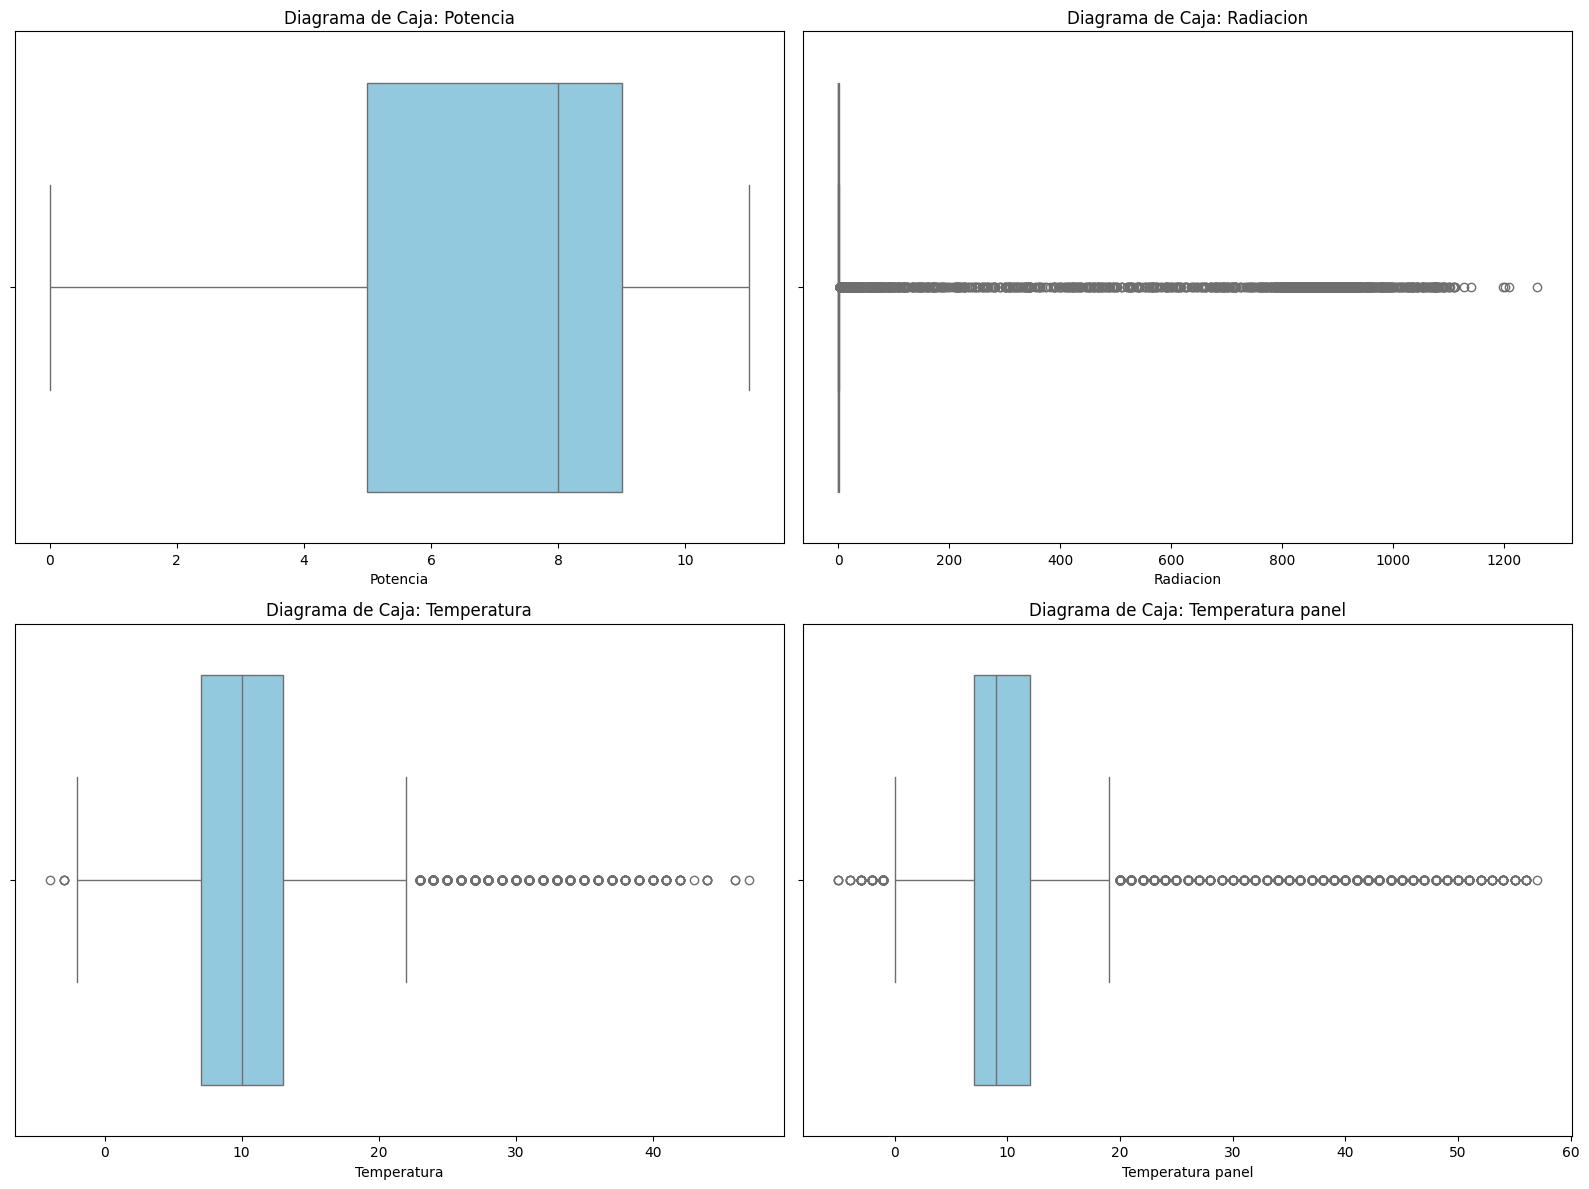


Datos después de eliminar outliers:
                  id     Potencia    Radiacion  Temperatura  Temperatura panel
count    6993.000000  6993.000000  6993.000000  6993.000000        6993.000000
mean    56084.893894     8.072787     0.092521     8.694123           8.372658
std     28476.540689     1.555144     0.352974     2.977479           3.158631
min       469.000000     0.000000     0.000000     1.000000           0.000000
25%     28614.000000     8.000000     0.000000     7.000000           6.000000
50%     53772.000000     8.000000     0.000000     9.000000           9.000000
75%     84973.000000     9.000000     0.000000    11.000000          10.000000
max    104666.000000    11.000000     2.000000    17.000000          16.000000

Datos después de la normalización:
      Radiacion  Temperatura  Temperatura panel
469    5.404404     2.789767           2.414934
603   -0.262137     0.102738          -0.117989
700    2.571133     1.782131           1.781703
1175  -0.262137     0.77

In [3]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar archivo desde Google Colab
from google.colab import files
uploaded = files.upload()

# Cargar los datos
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Análisis exploratorio inicial
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Validar inconsistencias
print("\nValores negativos en 'Potencia':", (data['Potencia'] < 0).sum())
print("Valores negativos en 'Radiacion':", (data['Radiacion'] < 0).sum())

# Eliminar valores negativos en 'Potencia' y 'Radiacion'
data = data[data['Potencia'] >= 0]
data = data[data['Radiacion'] >= 0]
print("\nDatos después de eliminar valores negativos:")
print(data.describe())

# Visualización y detección de outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Potencia', 'Radiacion', 'Temperatura', 'Temperatura panel'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Diagrama de Caja: {col}')

plt.tight_layout()
plt.show()

# Eliminar outliers utilizando el método del rango intercuartílico (IQR)
def eliminar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ['Potencia', 'Radiacion', 'Temperatura', 'Temperatura panel']:
    data = eliminar_outliers(data, col)

print("\nDatos después de eliminar outliers:")
print(data.describe())

# Normalización o estandarización de las variables de entrada
scaler = StandardScaler()
columns_to_scale = ['Radiacion', 'Temperatura', 'Temperatura panel']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("\nDatos después de la normalización:")
print(data[columns_to_scale].head())

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de validación: {val.shape}")
print(f"Tamaño del conjunto de prueba: {test.shape}")

# Guardar conjuntos procesados
train.to_csv("train_preprocessed.csv", index=False)
val.to_csv("val_preprocessed.csv", index=False)
test.to_csv("test_preprocessed.csv", index=False)
print("Conjuntos preprocesados guardados.")


Saving lechuzasdataset.csv to lechuzasdataset.csv
Tamaño del conjunto de entrenamiento: (6493, 3)
Tamaño del conjunto de validación: (1392, 3)
Tamaño del conjunto de prueba: (1392, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando FFNN...
Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 35.2165 - mae: 5.0049 - val_loss: 5.4835 - val_mae: 1.6131
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3019 - mae: 1.5046 - val_loss: 4.6097 - val_mae: 1.2165
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8788 - mae: 1.4036 - val_loss: 4.5453 - val_mae: 1.1993
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0152 - mae: 1.4352 - val_loss: 4.4407 - val_mae: 1.2348
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5036 - mae: 1.3463 - val_loss: 4.4061 - val_mae: 1.3128
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5934 - mae: 1.3561 - val_loss: 4.3102 - val_mae: 1.1872
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4924 - mae: 1.3369 - val_loss: 4.2954 - val_mae: 1.1782
Epoch 8/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5819 - mae: 1.3624 - val_loss: 4.2167 - val_mae: 1.1227
Epoch 9/100
203/203 ━━━━━━━

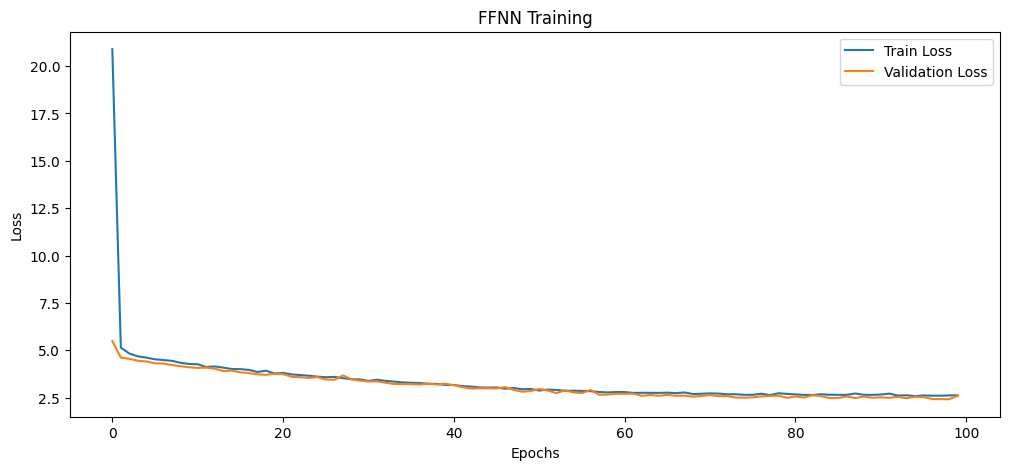

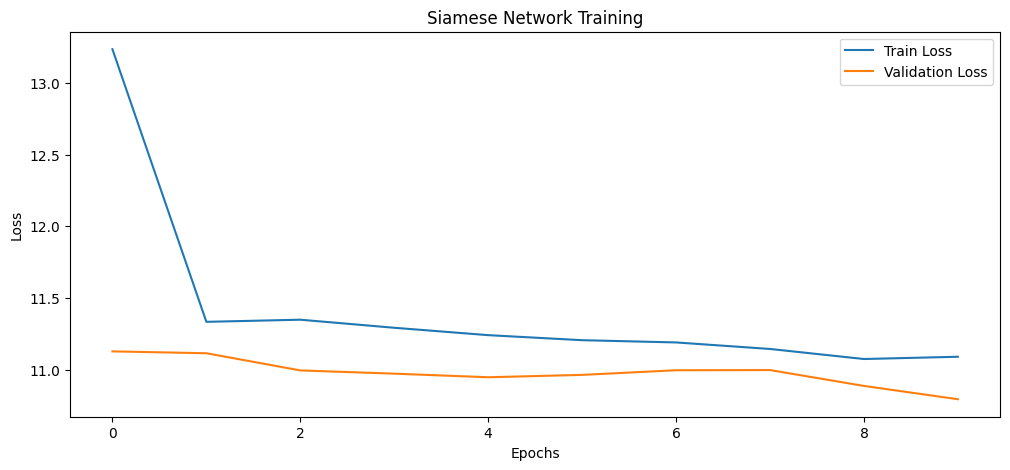

In [1]:
# Instalar TensorFlow si es necesario
!pip install tensorflow

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, callbacks

# Cargar archivo desde Google Colab
from google.colab import files
uploaded = files.upload()

# Cargar los datos
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Validación y preprocesamiento
# Eliminar valores negativos en 'Potencia' y 'Radiacion'
data = data[data['Potencia'] >= 0]
data = data[data['Radiacion'] >= 0]

# Escalamiento de las variables de entrada
scaler = StandardScaler()
columns_to_scale = ['Radiacion', 'Temperatura', 'Temperatura panel']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Separar características y variable objetivo
X = data[['Radiacion', 'Temperatura', 'Temperatura panel']].values
y = data['Potencia'].values

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Crear el modelo FFNN
def create_ffnn(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Salida para regresión
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Crear el modelo Siamesa adaptado
def create_siamese(input_shape):
    input_a = layers.Input(shape=(input_shape,))
    input_b = layers.Input(shape=(input_shape,))

    shared_network = models.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu')
    ])

    processed_a = shared_network(input_a)
    processed_b = shared_network(input_b)

    merged = layers.concatenate([processed_a, processed_b])
    output = layers.Dense(1)(merged)

    model = models.Model(inputs=[input_a, input_b], outputs=output)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Inicializar los modelos
ffnn = create_ffnn(X_train.shape[1])
siamese = create_siamese(X_train.shape[1])

# Callbacks para regularización
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar FFNN
print("\nEntrenando FFNN...")
history_ffnn = ffnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Generar datos dummy para entrenar Siamesa (usualmente necesita pares)
def generate_siamese_data(X, y):
    n_samples = len(X)
    X1 = X
    X2 = X[np.random.permutation(n_samples)]
    y_diff = np.abs(y - y[np.random.permutation(n_samples)])
    return [X1, X2], y_diff

X_train_siamese, y_train_siamese = generate_siamese_data(X_train, y_train)
X_val_siamese, y_val_siamese = generate_siamese_data(X_val, y_val)

print("\nEntrenando Red Neuronal Siamesa...")
history_siamese = siamese.fit(
    X_train_siamese, y_train_siamese,
    validation_data=(X_val_siamese, y_val_siamese),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluar los modelos
print("\nEvaluando FFNN...")
ffnn_eval = ffnn.evaluate(X_test, y_test, verbose=0)
ffnn_preds = ffnn.predict(X_test)

print("\nEvaluando Siamesa...")
X_test_siamese, y_test_siamese = generate_siamese_data(X_test, y_test)
siamese_eval = siamese.evaluate(X_test_siamese, y_test_siamese, verbose=0)
siamese_preds = siamese.predict(X_test_siamese)

# Métricas
print("\nMétricas FFNN:")
print(f"MSE: {mean_squared_error(y_test, ffnn_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_test, ffnn_preds):.4f}")
print(f"R²: {r2_score(y_test, ffnn_preds):.4f}")

print("\nMétricas Siamesa:")
print(f"MSE: {mean_squared_error(y_test_siamese, siamese_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_test_siamese, siamese_preds):.4f}")
print(f"R²: {r2_score(y_test_siamese, siamese_preds):.4f}")

# Gráficos de entrenamiento
def plot_training(history, title):
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training(history_ffnn, "FFNN Training")
plot_training(history_siamese, "Siamese Network Training")
